This is going to be the Jupyter Notebook for the IBM Dataset

In [130]:
import os
import tarfile
import urllib.request
import pandas as pd

In [131]:
load_ibm_data = pd.read_csv("C:/Users/alt98/Desktop/Machine Learning Project/Employee_Retention/Dataset - IBM.csv")

In [132]:
ibm_data = load_ibm_data.copy()
#make sure it works
ibm_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [133]:
#change titles to lowercase
ibm_data.columns = ibm_data.columns.str.lower()

In [134]:
#let's see what kind of data we have here
ibm_data.info()
# o null values in the dataset, so we can proceed with the analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   object
 7   educationfield            1470 non-null   object
 8   employeenumber            1470 non-null   int64 
 9   environmentsatisfaction   1470 non-null   object
 10  gender                    1470 non-null   object
 11  hourlyrate                1470 non-null   int64 
 12  jobinvolvement            1470 non-null   object
 13  joblevel                  1470 non-null   object
 14  jobrole                 

In [135]:
# Get value counts for all category-type columns
categorical_columns = ibm_data.select_dtypes(include='object')  # Select category-type columns
value_counts = {col: categorical_columns[col].value_counts() for col in categorical_columns.columns}

# Print the value counts for each column
for col, counts in value_counts.items():
    print(f"Value counts for column '{col}':")
    print(counts)
    print()

Value counts for column 'attrition':
attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for column 'businesstravel':
businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for column 'department':
department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for column 'education':
education
Bachelor        572
Master          398
Some College    282
High School     170
Doctor           48
Name: count, dtype: int64

Value counts for column 'educationfield':
educationfield
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Value counts for column 'environmentsatisfaction':
environmentsatisfaction
high         453
very high    446
medium       287
low          284
Name: count, dtype: int64

Va

In [136]:
#look numerical columns
ibm_data.describe()


,age,dailyrate,distancefromhome,employeenumber,hourlyrate,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,standardhours,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


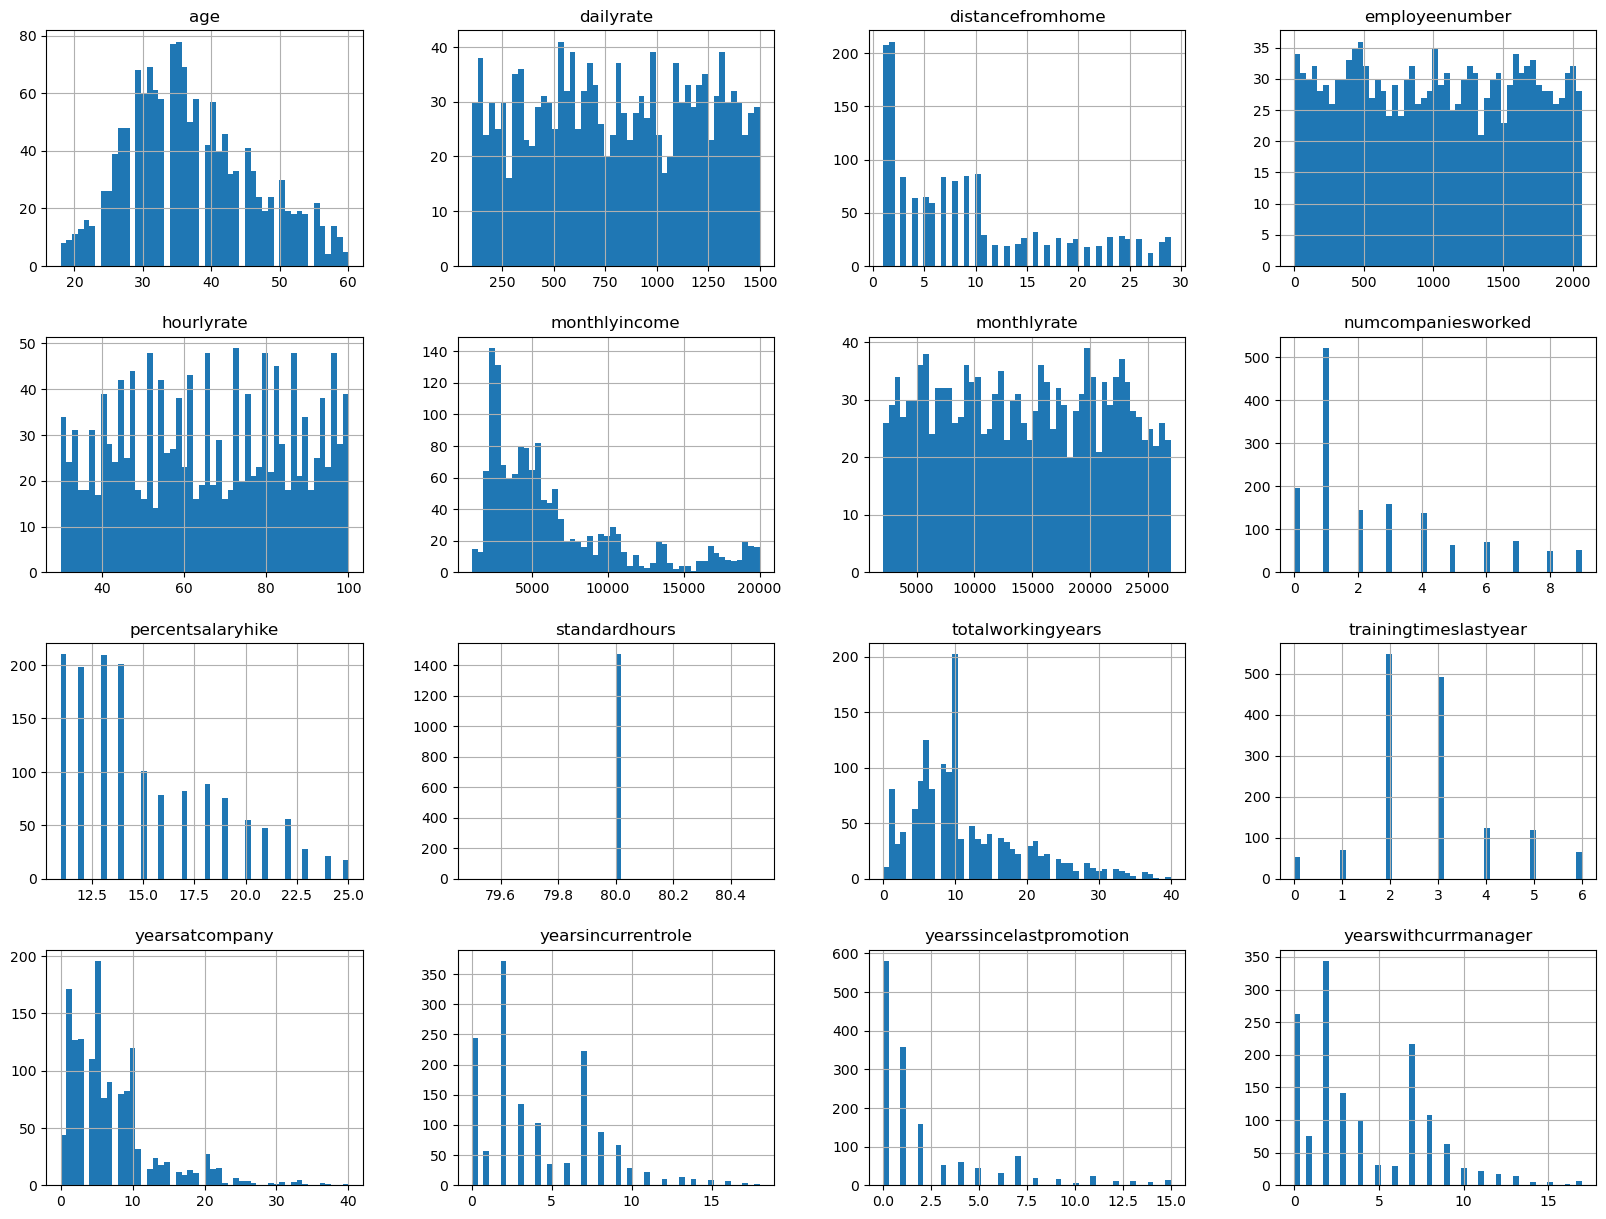

In [137]:
# Visualize the numeric columns
%matplotlib inline
import matplotlib.pyplot as plt
ibm_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [138]:
#drop the columns that are not needed for the analysis
ibm_data.drop(columns=['employeenumber', 'standardhours'], inplace=True)

In [139]:
#create a training set
import numpy as np

In [140]:
#compute a hash of each instance identifier 
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [141]:
#create an identifier column using the row index
ibm_data_with_id = ibm_data.reset_index()
train_set, test_set =  split_train_test_by_id(ibm_data_with_id, 0.2, "index")

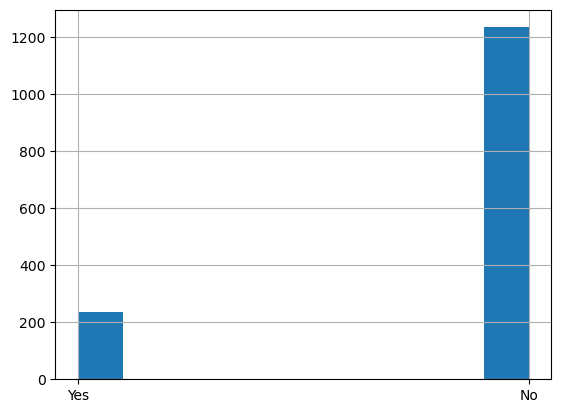

In [142]:
# We are looking to measure attrition so let's visualize the ratio of yes to no.
ibm_data['attrition'].hist()
plt.show()
#the ratio of yes to know is adequate for the exploratory analysis.

In [143]:
#set up stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(ibm_data, ibm_data['attrition']):
    strat_train_set = ibm_data.loc[train_index]
    strat_test_set = ibm_data.loc[test_index]
#check the stratified sampling
strat_test_set['attrition'].value_counts() 


attrition
No     247
Yes     47
Name: count, dtype: int64

In [144]:
#change categorical values to dummy variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
categorical_columns_1hot = cat_encoder.fit_transform(categorical_columns)
categorical_columns_1hot 

<1470x66 sparse matrix of type '<class 'numpy.float64'>'
	with 24990 stored elements in Compressed Sparse Row format>

In [145]:
#change encoded columns to int64
categorical_columns_1hot = categorical_columns_1hot.astype('int64')

In [146]:
# Encode the 'attrition' column to numeric values in the original dataframe
ibm_data['attrition'] = ibm_data['attrition'].map({'Yes': 1, 'No': 0})

# Create a correlation matrix using only numeric columns
numeric_ibm_data = ibm_data.select_dtypes(include=['number'])
corr_matrix = numeric_ibm_data.corr()


# Convert the one-hot encoded sparse matrix to a dense DataFrame
categorical_columns_1hot_df = pd.DataFrame(categorical_columns_1hot.toarray(), 
                                           columns=cat_encoder.get_feature_names_out(categorical_columns.columns),
                                           index=ibm_data.index)

# Concatenate the one-hot encoded columns with the original dataframe
ibm_data_encoded = pd.concat([numeric_ibm_data, categorical_columns_1hot_df], axis=1)

# Create a correlation matrix using the updated dataframe
corr_matrix = ibm_data_encoded.corr()

#drop the 'attrition column because it is not needed for the analysis
corr_matrix.drop(columns=['attrition'], inplace=True)

# Sort by correlation with 'attrition'
corr_matrix['attrition_Yes'].sort_values(ascending=False)

attrition_Yes           1.000000
attrition               1.000000
overtime_Yes            0.246118
joblevel_Entry          0.212551
stockoptionlevel_nan    0.195342
                          ...   
monthlyincome          -0.159840
yearsincurrentrole     -0.160545
totalworkingyears      -0.171063
overtime_No            -0.246118
attrition_No           -1.000000
Name: attrition_Yes, Length: 81, dtype: float64

In [147]:
# Get the correlation values for 'attrition'
if 'attrition_Yes' in corr_matrix.columns:
	attrition_corr = corr_matrix['attrition_Yes']
else:
	raise KeyError("The column 'attrition_Yes' does not exist in the correlation matrix. Please check the column names.")

# Identify columns negatively correlated with 'attrition'
negatively_correlated_columns = attrition_corr[attrition_corr < 0].index.tolist()

# Print the negatively correlated columns
print("Columns negatively correlated with attrition (Yes):")
print(negatively_correlated_columns)

Columns negatively correlated with attrition (Yes):
['age', 'dailyrate', 'hourlyrate', 'monthlyincome', 'percentsalaryhike', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager', 'attrition_No', 'businesstravel_Non-Travel', 'businesstravel_Travel_Rarely', 'department_Research & Development', 'education_Doctor', 'education_Master', 'education_Some College', 'educationfield_Life Sciences', 'educationfield_Medical', 'educationfield_Other', 'environmentsatisfaction_high', 'environmentsatisfaction_medium', 'environmentsatisfaction_very high', 'gender_Female', 'jobinvolvement_high', 'jobinvolvement_very high', 'joblevel_Director', 'joblevel_Junior', 'joblevel_Middle', 'joblevel_Senior', 'jobrole_Healthcare Representative', 'jobrole_Manager', 'jobrole_Manufacturing Director', 'jobrole_Research Director', 'jobrole_Research Scientist', 'jobsatisfaction_very high', 'maritalstatus_Divorced', 'maritalstatus_Married'

In [148]:
# Filter the columns to drop only those that exist in the DataFrame
columns_to_drop = [col for col in negatively_correlated_columns if col in ibm_data_encoded.columns]

# Drop the negatively correlated columns from the DataFrame
ibm_data_encoded.drop(columns=columns_to_drop, inplace=True)

# Verify the updated DataFrame
print("Updated DataFrame after dropping negatively correlated columns:")
print(ibm_data_encoded.head())

Updated DataFrame after dropping negatively correlated columns:
   attrition  distancefromhome  monthlyrate  numcompaniesworked  \
0          1                 1        19479                   8   
1          0                 8        24907                   1   
2          1                 2         2396                   6   
3          0                 3        23159                   1   
4          0                 2        16632                   9   

   attrition_Yes  businesstravel_Travel_Frequently  \
0              1                                 0   
1              0                                 1   
2              1                                 0   
3              0                                 1   
4              0                                 0   

   department_Human Resources  department_Sales  education_Bachelor  \
0                           0                 1                   0   
1                           0                 0                   

In [149]:
ibm_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   attrition                         1470 non-null   int64
 1   distancefromhome                  1470 non-null   int64
 2   monthlyrate                       1470 non-null   int64
 3   numcompaniesworked                1470 non-null   int64
 4   attrition_Yes                     1470 non-null   int64
 5   businesstravel_Travel_Frequently  1470 non-null   int64
 6   department_Human Resources        1470 non-null   int64
 7   department_Sales                  1470 non-null   int64
 8   education_Bachelor                1470 non-null   int64
 9   education_High School             1470 non-null   int64
 10  educationfield_Human Resources    1470 non-null   int64
 11  educationfield_Marketing          1470 non-null   int64
 12  educationfield_Technical Degree   

In [ ]:
#let's clean up the columns a little bit more
ibm_data_encoded.drop(columns=['attrition'], inplace=True) #we are focused on the yes or no answers that were created with Onehot.

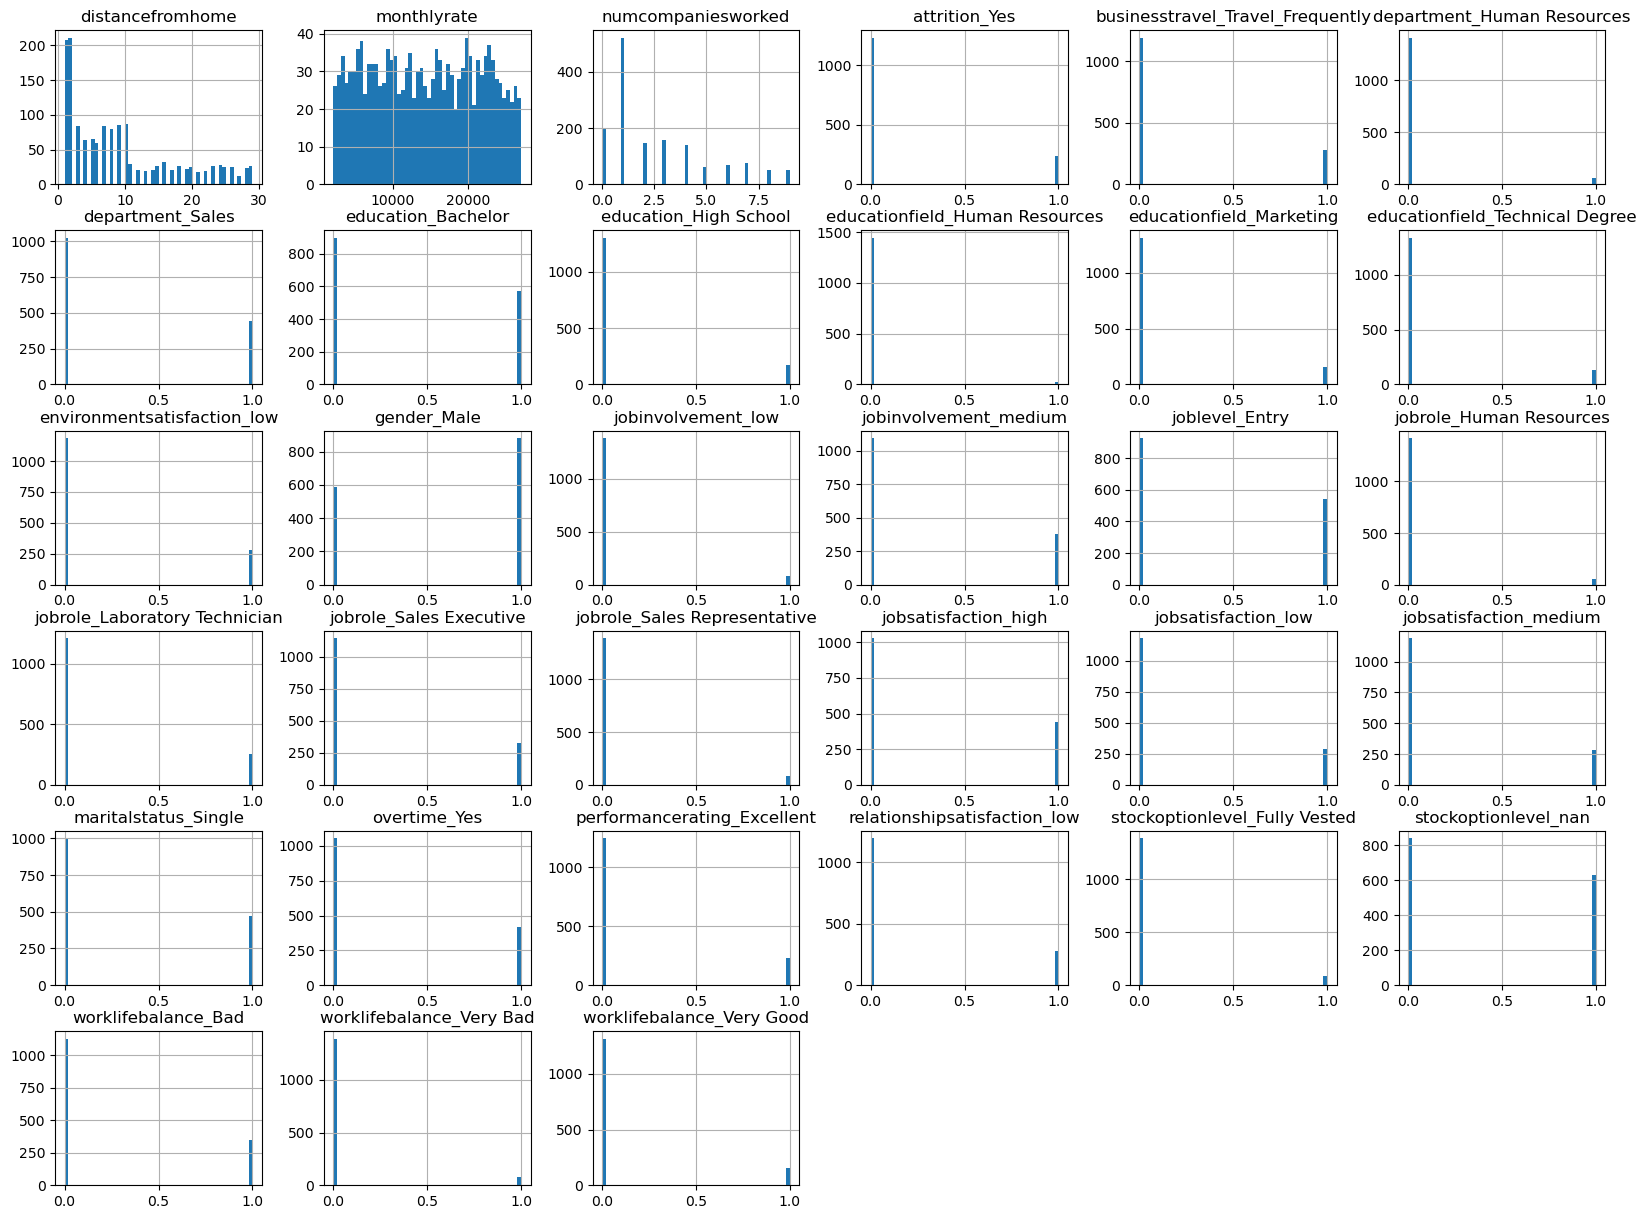

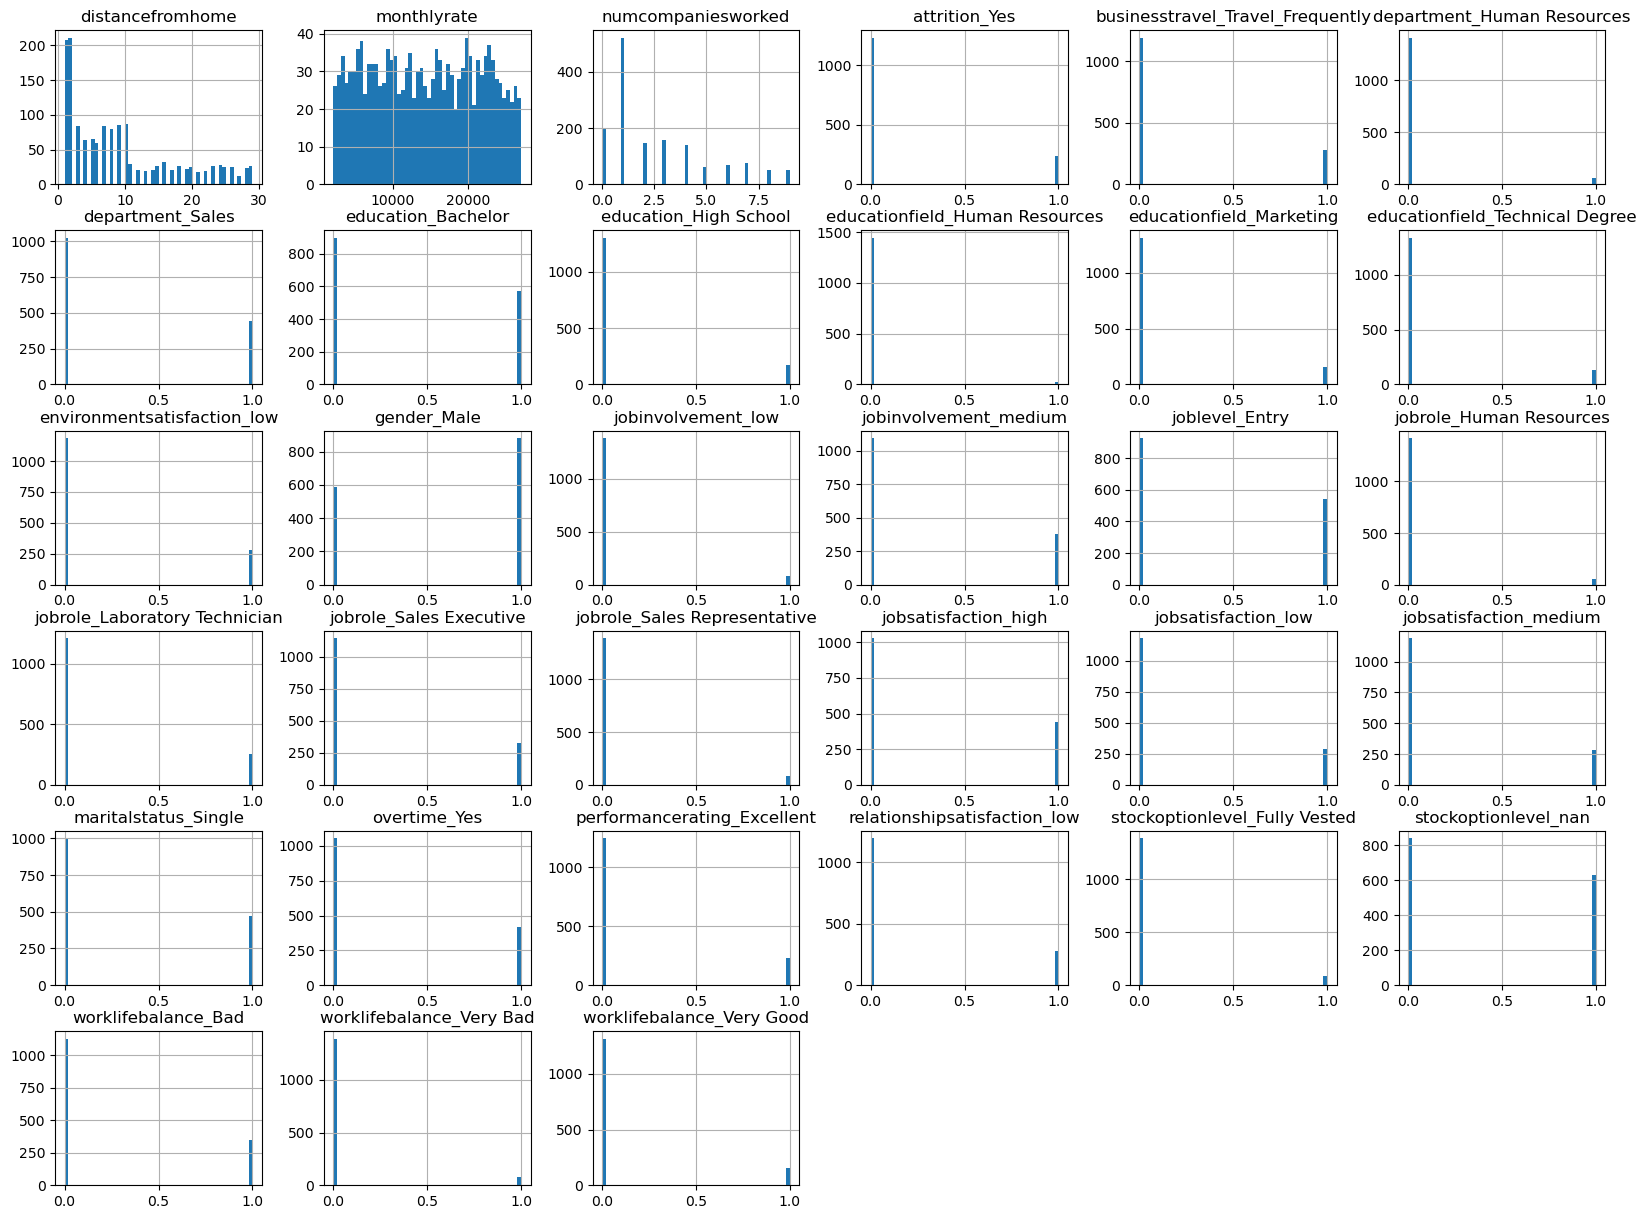

In [ ]:
#let's visualize the new variables and see if there are any that can be dropped or combined with others. 
ibm_data_encoded.hist(bins=50, figsize=(20, 15))
plt.show()